Alexander Beckwith

Math 855 - Prob w/ Applications

HW3

In [1]:
from math import comb

# 3rd party imports
from matplotlib.pyplot import subplots as plt
from pandas import DataFrame

# local imports
from prob_dist import show_dist, binom, binom_dist, neg_binom_dist
from prob_dist import geom_dist, pois, pois_dist
from samplespace import CoinSampleSpace

Problems from Chapter 2: Problems 3, 12, 14, 18, 20, 22, 25, 26, 30 and 31

3. The following table shows the cumulative distribution function of a discrete random variable. Find the frequency function.

The cdf for the function at points [0, 1, 2, 3, 4, 5] is shown as [0, 0.1, 0.3, 0.7, 0.8, 1]
To find the freq func, we'll need to look at the change in the cdf value at each interval.
from k = 0 to k = 1, the change in the cdf is 0.1
from k = 1 to k = 2, the change in the cdf is 0.2
from k = 2 to k = 3, the change in the cdf is 0.4
from k = 3 to k = 4, the change in the cdf is 0.1
from k = 4 to k = 5, the change in the cdf is 0.2

3 | The frequency function compared to the cdf is shown
in the following DataFrame and plot:


,k,F(k),f(k)
0,0,0.0,0.0
1,1,0.1,0.1
2,2,0.3,0.2
3,3,0.7,0.4
4,4,0.8,0.1
5,5,1.0,0.2


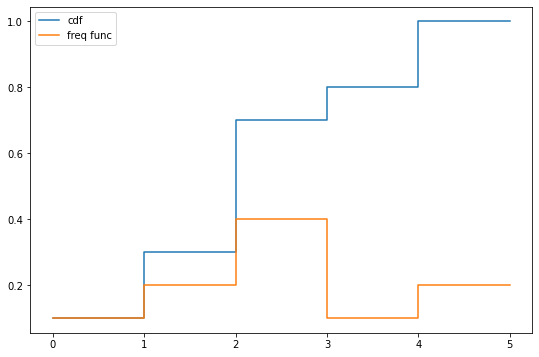

In [2]:
# We're graphing a discrete variable, so to get the point
# to take up the spans between each interval, we need to duplicate
# all values aside from the first and last, hence this function
def ext_discrete_list(lst: list):
    out_list = []
    lst_mid = lst[1:-1]
    for item in lst_mid:
        out_list.append(item)
        out_list.append(item)
    return [lst[0]] + out_list + [lst[-1]]

k = [0, 1, 2, 3, 4, 5]
k_lst = ext_discrete_list(k)
fk = [0, .1, .3, .7, .8, 1]
fk_lst = ext_discrete_list(fk)[1:] + [fk[-1]]

print(f"The cdf for the function at points {k} is shown as {fk}")
print("To find the freq func, we'll need to look at the change in the cdf value at each interval.")
dfk_df = []
dfk = []
for i in range(len(k) - 1):
    dk = k[i + 1] - k[i]
    df = fk[i + 1] - fk[i]
    df_dk = round(df/dk, 2)
    dfk_df.append(df_dk)
    dfk.append(df_dk)
    dfk.append(df_dk)
    print(f"from k = {k[i]} to k = {k[i + 1]}, the change in the cdf is {df_dk}")

df_dict = {
    "k": k,
    "F(k)": fk,
    "f(k)": [0] + dfk_df
}
df = DataFrame.from_dict(df_dict)
print()
print("3 | The frequency function compared to the cdf is shown")
print("in the following DataFrame and plot:")
fig, ax = plt(1, 1, figsize= (9, 6))
ax.plot(k_lst, fk_lst, label="cdf")
ax.plot(k_lst, dfk, label="freq func")
ax.legend()
df

12. Which is more likely: 9 heads in 10 tosses of a fair coin or 18  heads in 20 tosses?

We'll attack this the old fashioned way and the mathematical way.
Here are the number of flips: 20 and 10 flips.

The binomial frequency function is defined as:
P( X = k ) = (comb(num of trials | num of successes) * (prob of success *to the* num of trials) )
the prob of flipping 18 heads out of 20 is 0.0002, or using the binomial freq function, 0.0002
the prob of flipping 9 heads out of 10 is 0.0098, or using the binomial freq function, 0.0098
12 | Therefore, flipping 9 out of 10 is more likely than 18 out of 20.


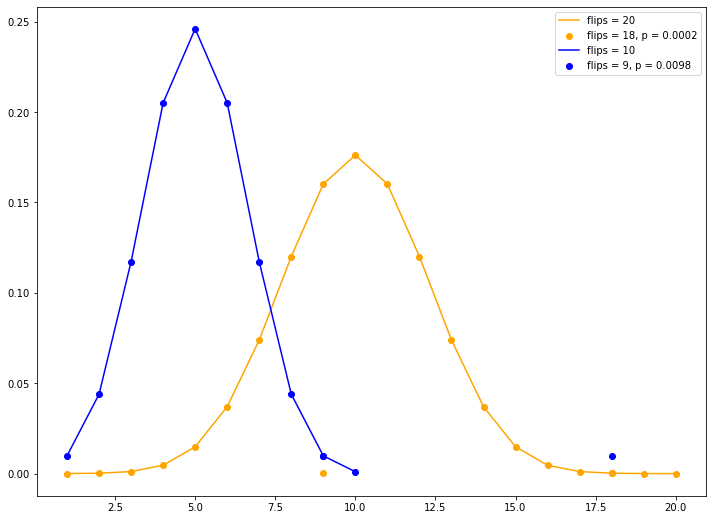

In [3]:
print("We'll attack this the old fashioned way and the mathematical way.")
n_flips1 = 20
n_flips2 = 10
print(f"Here are the number of flips: {n_flips1} and {n_flips2} flips.")

print("\nThe binomial frequency function is defined as:")
print("P( X = k ) = (comb(num of trials | num of successes) * (prob of success *to the* num of trials) )")
# coin func presumes p = 0.5
bi_coin = lambda i, out_of: round(comb(out_of, i) * (.5) ** out_of, 4)

# performing the loops to make lists to graph
x1 = [i for i in range(1, n_flips1 + 1)]
y1 = [bi_coin(j, n_flips1) for j in x1]
x2 = [i for i in range(1, n_flips2 + 1)]
y2 = [bi_coin(j, n_flips2) for j in x2]

#indexing the values of interest to highlight
x1_idx = x1.index(18)
x1_hili = x1[x1_idx]
y1_hili = y1[x1_idx]

x2_idx = x2.index(9)
x2_hili = x2[x2_idx]
y2_hili = y2[x2_idx]

#creating the plot
fig, ax = plt(1, 1, figsize=(12, 9))
ax.plot(x1, y1, label="flips = 20", c = "orange")
ax.scatter(x1, y1, c = "orange")
ax.scatter(x1_hili, y1_hili, c = "orange", label=f"flips = 18, p = {y1_hili}")
ax.scatter(x2_hili, y1_hili, c = "orange")
ax.plot(x2, y2, label="flips = 10", c = "blue")
ax.scatter(x2, y2, c = "blue")
ax.scatter(x1_hili, y2_hili, c = "blue", label=f"flips = 9, p = {y2_hili}")
ax.scatter(x2_hili, y2_hili, c = "blue")
ax.legend()

coin1 = {x1[i]: y1[i] for i in range(n_flips1)}
binom1 = round(binom(20, 18, .5), 4)
coin2 = {x2[i]: y2[i] for i in range(n_flips2)}
binom2 = round(binom(10, 9, .5), 4)

print(f"the prob of flipping {18} heads out of {n_flips1} is {coin1[18]}, or using the binomial freq function, {binom1}")
print(f"the prob of flipping {9} heads out of {n_flips2} is {coin2[9]}, or using the binomial freq function, {binom2}")
print("12 | Therefore, flipping 9 out of 10 is more likely than 18 out of 20.")

14. Two boys play basketball in the following way. They take turns shooting and stop when a basket is made. Player A goes first and has probability p1 of making a basket on any throw. Player B, who shoots second, has probability p2 of making a basket. The outcomes of the successive trials are assumed to be independent.

a. Find the frequency function for the total number of attempts. 

b. What is the probability that player A wins?

This basketball game can be modelled as a geometric distribution because the rules dictate that we're seeking the number of trials before the kth success, when either of the players makes a basket.

14a | I'm expressing the frequency function as a piece-wise function dependent on the total number of shots, k.

[Player 2 wins] | P ( X = k if k mod 2 = 0) = (1 - p1)^(k / 2) * (1 - p2)^((k / 2) - 1) * p2

[Player 1 wins] | P ( X = k if k mod 2 = 1) = (1 - p1)^((k - 1) / 2) * (1 - p2)^(((k - 1)) / 2 + 1) * p1

14b | The probability of player A winning can be calculated by summing the output of the component of the piece-wise function where player 1 wins, aka when the total number of shots is odd, because player 1 shoots first. 

 Σ[ (1 - p1)^((k - 1) / 2) * (1 - p2)^(((k - 1)) / 2 + 1) * p1 ] 

Here is a model of 14 using p1 = 0.5 and p2 = 0.7


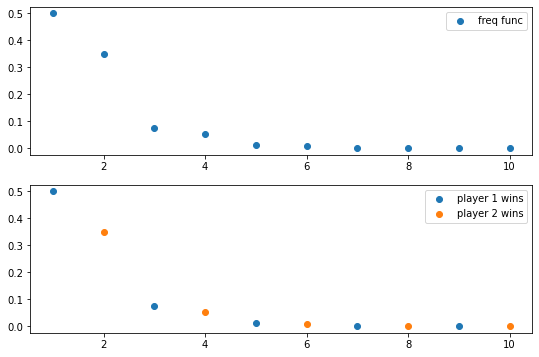

In [4]:
p1 = 0.5
p2 = 0.7
print(f"Here is a model of 14 using p1 = {p1} and p2 = {p2}")
def bball_freq(shots: int, p1: float = p1, p2: float = p2):
    # switch off shooting, so winning shot is p2 
    # if total shots is even
    if shots % 2 == 0:
        last_shot = p2
    else:
        last_shot = p1
    
    # for calc, all but last shot is miss
    shots -= 1
    q1 = 1 - p1
    q2 = 1 - p2

    p2_shots = shots // 2
    p1_shots = shots - p2_shots
    prob1 = q1 ** p1_shots
    prob2 = q2 ** p2_shots
    return prob1 * prob2 * last_shot
x = [x for x in range(1, 11)]
y = [bball_freq(i) for i in x]
x_p1_wins = [i for i in x if i % 2 == 1]
y_p1_wins = [bball_freq(i) for i in x_p1_wins]
x_p2_wins = [i for i in x if i % 2 == 0]
y_p2_wins = [bball_freq(i) for i in x_p2_wins]

fig, (ax1, ax2) = plt(2, 1, figsize=(9, 6))
ax1.scatter(x, y, label = "freq func")
ax2.scatter(x_p1_wins, y_p1_wins, label = "player 1 wins")
ax2.scatter(x_p2_wins, y_p2_wins, label = "player 2 wins")
ax1.legend()
ax2.legend()

18. Continuing with Problem 17, find the frequency function for the number of failures up to the rth success.

18 | The frequency function for the number of failures up to the rth success is the definition of the negative binomial distribution.

P (X = k) = combination( k + r - 1, k ) * p^r * (1 - p)^k

where k is the number of failures up to the rth success

here's an expression of the negative binomial distribution using Python:
(see prob_dist.py for the code)


Text(0, 0.5, 'P(X = k)')

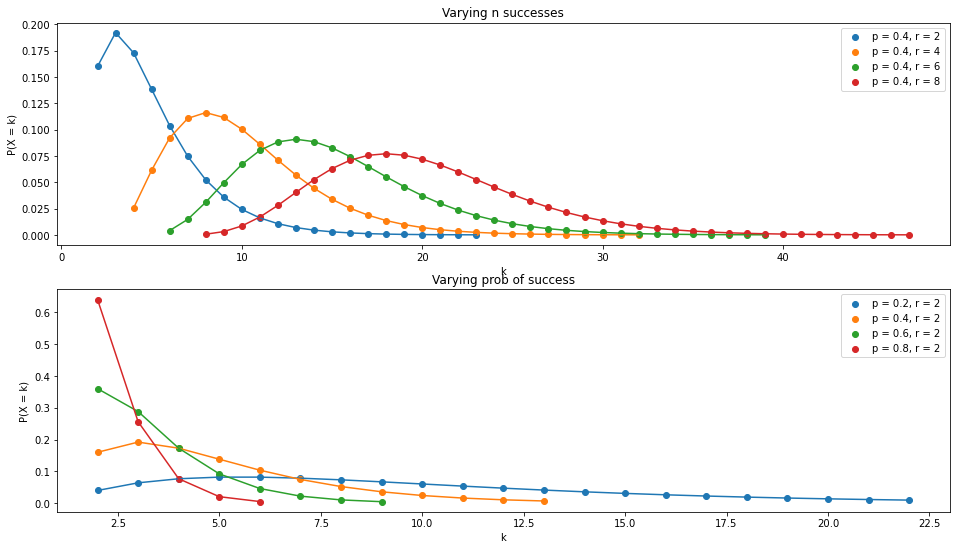

In [5]:
print("here's an expression of the negative binomial distribution using Python:")
print("(see prob_dist.py for the code)")
p_negb_1 = [0.4]
p_negb_rng = [i / 10 for i in range(2, 10, 2)]
r_negb_1 = [2]
r_negb_rng = [i for i in range(2, 9, 2)]

fig, (ax1, ax2) = plt(2, 1, figsize=(16, 9))
for p in p_negb_1:
    for r in r_negb_rng:
        gd = neg_binom_dist(r, p, min_prob=1e-4)
        ax1.plot(gd["k"], gd["prob"])
        ax1.scatter(gd["k"], gd["prob"], label = f"p = {p}, r = {r}")
for p in p_negb_rng:
    for r in r_negb_1:
        gd = neg_binom_dist(r, p, min_prob=1e-2)
        ax2.plot(gd["k"], gd["prob"])
        ax2.scatter(gd["k"], gd["prob"], label = f"p = {p}, r = {r}")

ax1.legend()
ax1.set_title("Varying n successes")
ax1.set_xlabel("k")
ax1.set_ylabel("P(X = k)")
ax2.set_title("Varying prob of success")
ax2.legend()
ax2.set_xlabel("k")
ax2.set_ylabel("P(X = k)")

20. If X is a geometric random variable with p = .5, for what value of k is P(X ≤ k) ≈ .99?

20 | Since X is a random variable with a known probability mass function, the probability of X ≤ k can be defined as the sum of P(X = k) for k ≤ k when P(X ≤ k) ≈ 0.99.

In [6]:
print("Let's have Python doing the computing on this one.")
print("We'll define a variable for the prob at which we'd like our summing loop to stop.")

max_prob = 0.99
print(f"max_prob = {max_prob}\n")
print("We'll create a function to perform our geometric computation:")
print("geo = lambda k, p: ((1 - p) ** (k -1)) * p")

# this is called an anonymous function
# using lambda allows us to define a simple function in one line
geo = lambda k, p: ((1 - p) ** (k -1)) * p

for i in range(1, 15):
    prob = sum([geo(j + 1, 0.5) for j in range(i)])
    print(f"when p = 0.5, P(1 ≤ X ≤ {i}) = {round(prob, 4)}")
    if prob > max_prob:
        break
print(f"P(X ≤ k) ≈ .99 when k = {i}")

Let's have Python doing the computing on this one.
We'll define a variable for the prob at which we'd like our summing loop to stop.
max_prob = 0.99

We'll create a function to perform our geometric computation:
geo = lambda k, p: ((1 - p) ** (k -1)) * p
when p = 0.5, P(1 ≤ X ≤ 1) = 0.5
when p = 0.5, P(1 ≤ X ≤ 2) = 0.75
when p = 0.5, P(1 ≤ X ≤ 3) = 0.875
when p = 0.5, P(1 ≤ X ≤ 4) = 0.9375
when p = 0.5, P(1 ≤ X ≤ 5) = 0.9688
when p = 0.5, P(1 ≤ X ≤ 6) = 0.9844
when p = 0.5, P(1 ≤ X ≤ 7) = 0.9922
P(X ≤ k) ≈ .99 when k = 7


22. Three identical fair coins are thrown simultaneously until all three show the same face. What is the probability that they are thrown more than three times?


In [7]:
css = CoinSampleSpace(3).ss
print("Here is the sample space for throwing three coins at once:", css)
all_same = [x for x in css if (x == "ttt" or x == "hhh")]
print("Here is the subset of results with all three showing the same face:", all_same)
p_all_same = len(all_same) / len(css)
print(f"The probability for the occurance is therefore {len(all_same)} / {len(css)}, or {p_all_same}\n")
print("The probability of throwing the coins until all the same face occurs can be modelled as a geometric distribution.")
all_dist = geom_dist(p_all_same, min_prob=1e-2)
print("The probability of throwing more than three times is the complement of P(k = 1, 2, 3)\n")
p_k123 = all_dist["prob"][:3]
p_k123 = [round(x, 4) for x in p_k123]
print(f"P(k = 1, 2, 3) = {p_k123}")
print(f"P(k <= 3) = {round(sum(p_k123), 4)}")
print(f"P(k > 3) = {round(1 - sum(p_k123), 4)}")

Here is the sample space for throwing three coins at once: ['ttt', 'tth', 'tht', 'thh', 'htt', 'hth', 'hht', 'hhh']
Here is the subset of results with all three showing the same face: ['ttt', 'hhh']
The probability for the occurance is therefore 2 / 8, or 0.25

The probability of throwing the coins until all the same face occurs can be modelled as a geometric distribution.
The probability of throwing more than three times is the complement of P(k = 1, 2, 3)

P(k = 1, 2, 3) = [0.25, 0.1875, 0.1406]
P(k <= 3) = 0.5781
P(k > 3) = 0.4219


25. The probability of being dealt a royal straight flush (ace, king, queen, jack, and ten of the same suit) in poker is about 1.3 × 10−8. Suppose that an avid poker player sees 100 hands a week, 52 weeks a year, for 20 years.
a. What is the probability that she is never dealt a royal straight flush dealt? b. What is the probability that she is dealt exactly two royal straight flushes?

Each hand can be assumed to be an independent trial, therefore, this problem can be modelled using a binomial distribution.

In [8]:
p_rsf = 1.3e-8
p_not_rsf = 1 - p_rsf
total_hands = 100 * 52 * 20
print("The prob of being dealt a royal straight flush:", p_rsf)
print("The prob of not being dealt a royal straight flush:", p_not_rsf)
print("The total number of hands dealt in 10 years:", total_hands)
print("P(X = k) = comb(n, k) * p^k * (1 - p)^(n - k)\n")
for i in range(3):
    negb = round(binom(total_hands, i, p_rsf), 6)
    out = f"The prob of being dealt exactly {i} royal straight flushes is {negb}"
    if i == 0:
        print(f"25a | {out}")
    elif i == 2:
        print(f"25b | {out}")
    else:
        continue

The prob of being dealt a royal straight flush: 1.3e-08
The prob of not being dealt a royal straight flush: 0.999999987
The total number of hands dealt in 10 years: 104000
P(X = k) = comb(n, k) * p^k * (1 - p)^(n - k)

25a | The prob of being dealt exactly 0 royal straight flushes is 0.998649
25b | The prob of being dealt exactly 2 royal straight flushes is 1e-06


26. The university administration assures a mathematician that he has only 1 chance in 10,000 of being trapped in a much-maligned elevator in the mathematics building. If he goes to work 5 days a week, 52 weeks a year, for 10 years, and always rides the elevator up to his office when he first arrives, what is the probability that he will never be trapped? That he will be trapped once? Twice? Assume that the outcomes on all the days are mutually independent (a dubious assumption in practice).

Each ride can be assumed to be an independent trial, therefore, this problem can be modelled using a binomial distribution.

The prob of being trapped: 0.0001
The prob of not being trapped: 0.9999
The total number of rides in 10 years: 2600
P(X = k) = comb(n, k) * p^k * (1 - p)^(n - k)

prob of 0 times trapped: 0.7710415615298404
prob of 1 times trapped: 0.20049085508326683
prob of 2 times trapped: 0.026056392257296248


<AxesSubplot:xlabel='x', ylabel='P(X = x)'>

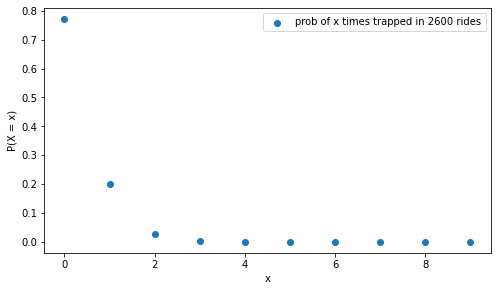

In [9]:
p_trapped = 1 / 10_000
p_not_trapped = 1 - p_trapped
rides = 5 * 52 * 10
print("The prob of being trapped:", p_trapped)
print("The prob of not being trapped:", p_not_trapped)
print("The total number of rides in 10 years:", rides)
print("P(X = k) = comb(n, k) * p^k * (1 - p)^(n - k)\n")

for i in range(3):
    prob = binom(rides, i, p_trapped)
    print(f"prob of {i} times trapped:", prob)
show_dist(binom_dist(rides, p_trapped, max_iter=10), label= f"prob of x times trapped in {rides} rides")

30. Suppose that in a city, the number of suicides can be approximated by a Poisson process with λ = .33 per month.

a. Find the probability of k suicides in a year for k = 0, 1, 2,.... What is the most probable number of suicides?

b. What is the probability of two suicides in one week?

With 0.33 per month, there are 0.0759 per week and 3.96 per year.
30a | The max prob occurs at 3, when p(x) = 0.1973
30b | The prob of two suicides in one week is: 0.0027


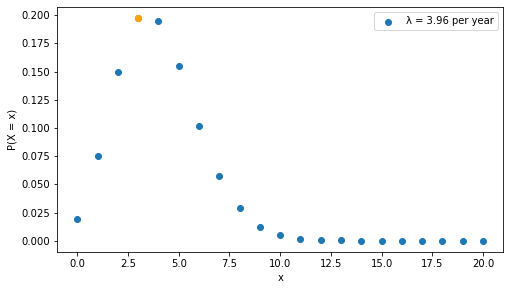

In [10]:
from math import e

λ = 0.33 # suicides / month
weeks_month = (365.25 / 7) / 12
λ_week = round(λ / weeks_month, 4)
λ_year = λ * 12
print(f"With {λ} per month, there are {λ_week} per week and {λ_year} per year.")

pd = pois_dist(λ_year)
sd = show_dist(pd, label=f"λ = {λ_year} per year")
probs = pd["prob"]
max_idx = probs.index(max(probs))
max_px = round(pd["prob"][max_idx], 4)
sd.scatter(max_idx, max_px, c="orange")
print(f"30a | The max prob occurs at {max_idx}, when p(x) = {max_px}")

print("30b | The prob of two suicides in one week is:", round(pois(2, λ_week), 4))

31. Phone calls are received at a certain residence as a Poisson process with parameter λ = 2 per hour.

a. If Diane takes a 10-min. shower, what is the probability that the phone rings during that time?

b. How long can her shower be if she wishes the probability of receiving no phone calls to be at most .5?

The prob of not getting a call in those 10 min is
P( k > 0 ) = 1 - P( k = 0 ) = (0.3333^0 * e^0.3333) / 1 = 0.7166
31a | Therefore the prob of getting a call during that 10min is the complement, 0.2834


<AxesSubplot:xlabel='x', ylabel='P(X = x)'>

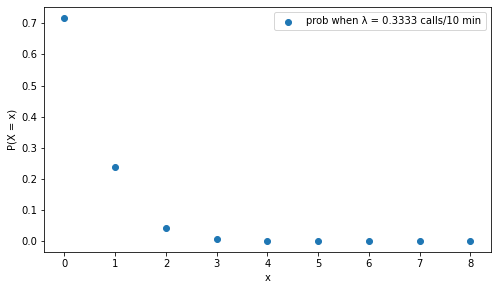

In [11]:
λ = 2 # calls / hour
λ_min = round(λ / 60, 4) # calls / min
λ_10min = round(λ / 6, 4) # calls / 10min
p_0_in_10 = round(pois(0, λ_10min), 4)
p_not_0_in_10 = round(1 - p_0_in_10, 4)
print("The prob of not getting a call in those 10 min is")
print(f"P( k > 0 ) = 1 - P( k = 0 ) = ({λ_10min}^{0} * e^{λ_10min}) / 1 =", p_0_in_10)
print("31a | Therefore the prob of getting a call during that 10min is the complement,", p_not_0_in_10)
show_dist(pois_dist(λ_10min), label=f"prob when λ = {λ_10min} calls/10 min")

In [12]:
print("To determine the length of time she can spend in the shower,")
print("we'll create a loop that iterates through different multiples")
print("of the avg call frequency, calculating p( 0 ) at that rate.\n")
shower_mins = []
zero_call_prob = []
print("The avg number of calls per minute is", λ_min)
λ_iter = p = 1
while p > 0.5:
    p = pois(0, λ_iter * λ_min)
    if (λ_iter%3 == 0 or p < 0.5):
        print(f"The prob of 0 calls in {λ_iter}min is {round(p, 4)}")
    shower_mins.append(λ_iter)
    zero_call_prob.append(round(p, 4))
    λ_iter += 1
print()
print(f"Diane can take a {λ_iter} min or longer shower for the prob of")
print(f"not getting a call to be {zero_call_prob[-1]} or less")


To determine the length of time she can spend in the shower,
we'll create a loop that iterates through different multiples
of the avg call frequency, calculating p( 0 ) at that rate.

The avg number of calls per minute is 0.0333
The prob of 0 calls in 3min is 0.9049
The prob of 0 calls in 6min is 0.8189
The prob of 0 calls in 9min is 0.741
The prob of 0 calls in 12min is 0.6706
The prob of 0 calls in 15min is 0.6068
The prob of 0 calls in 18min is 0.5491
The prob of 0 calls in 21min is 0.4969

Diane can take a 22 min or longer shower for the prob of
not getting a call to be 0.4969 or less
